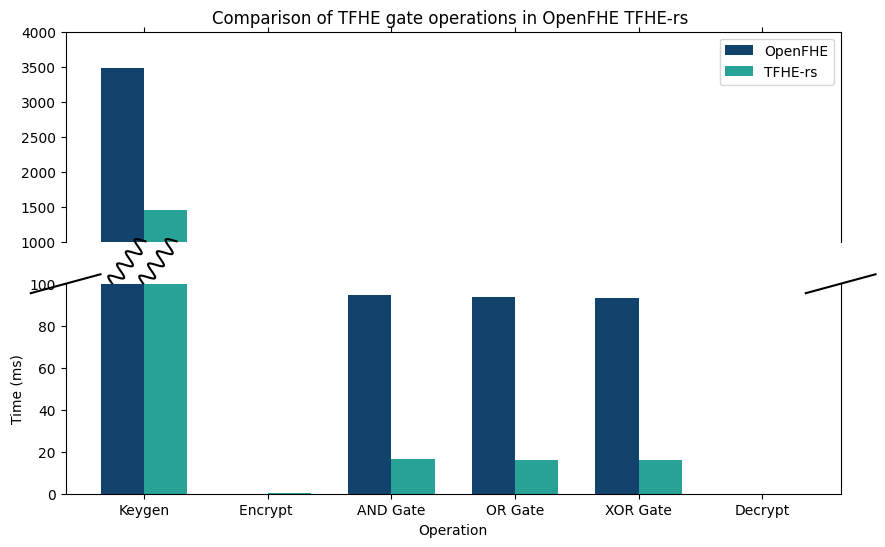

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Read the CSV file
df = pd.read_csv("tfhe_averages.csv")

# Define the headers for the columns to be grouped and plotted (excluding '#')
open_columns = ['openkeygenRtime', 'openencryptTime', 'openANDGate', 'openORGate', 'openXORGate', 'openDecryptTime']
rs_columns = ['rskeygenRtime', 'rsencryptTime', 'rsANDGate', 'rsORGate', 'rsXORGate', 'rsDecryptTime']

# Flatten the values for all open and rs columns
open_values = df[open_columns].values.flatten()
rs_values = df[rs_columns].values.flatten()

# Create labels for the x-axis based on operations
labels = ['Keygen', 'Encrypt ', 'AND Gate', 'OR Gate', 'XOR Gate', 'Decrypt']
colors = ['#12436D', '#28A197']

# Define the positions for the bars
x = range(len(labels))

# Set the width of the bars
bar_width = 0.35

# Set up the plot
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plot the open values in blue
ax.bar([p for p in x], open_values, width=bar_width, color=colors[0], label='OpenFHE')

# Plot the rs values in red, with bars positioned next to the open values
ax.bar([p + bar_width for p in x], rs_values, width=bar_width, color=colors[1], label='TFHE-rs')

# Plot the same data on the second axis
ax2.bar([p for p in x], open_values, width=bar_width, color=colors[0])
ax2.bar([p + bar_width for p in x], rs_values, width=bar_width, color=colors[1])

# Set the y-limits to skip the range between 1600 and 2400
ax.set_ylim(1000, 4000)  # outliers only
ax2.set_ylim(0, 100)  # most of the data

# Hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .045  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

with mpl.rc_context({'path.sketch': (7, 15, 1)}):
    ax.plot((0.02 , 0.10 ), (-0.4, 0.01), **kwargs)  # top-right diagonal
    ax.plot((0.06, 0.14 ), (-0.4, 0.01), **kwargs)  # top-right diagonal


kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.set_title(f'Comparison of TFHE gate operations in OpenFHE TFHE-rs ')
ax.legend()
plt.xticks([p + bar_width / 2 for p in x],  labels)
plt.xlabel('Operation')
plt.ylabel('Time (ms)')
plt.show()


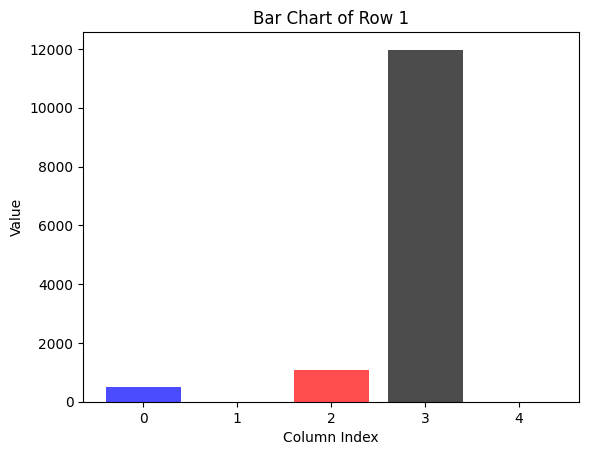

In [3]:
#Ploting All Graphs seperately
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("tfhe_averages.csv")

# List of columns you want to exclude
headers_to_filter = ['tfhekeygenRtime', 'tfheencryptTime', 'tfheAddTime', 'tfheMultTime', 'tfheDecryptTime']
colors = ['blue', 'green', 'red', 'black', 'magenta', 'yellow', 'black']

# Filter out the columns to be excluded
filtered_data = data[headers_to_filter]

# Get the number of rows and columns in the filtered data
num_rows, num_cols = filtered_data.shape

# Plot a separate bar graph for each row
for i in range(num_rows):
    row_data = filtered_data.iloc[i]
    color = colors[i % len(colors)]  # Ensure unique color for each row
    plt.bar(range(len(row_data)), row_data, color=colors, alpha=0.7)
    plt.xlabel('Column Index')
    plt.ylabel('Value')
    plt.title(f'Bar Chart of Row {i+1}')
    plt.show()


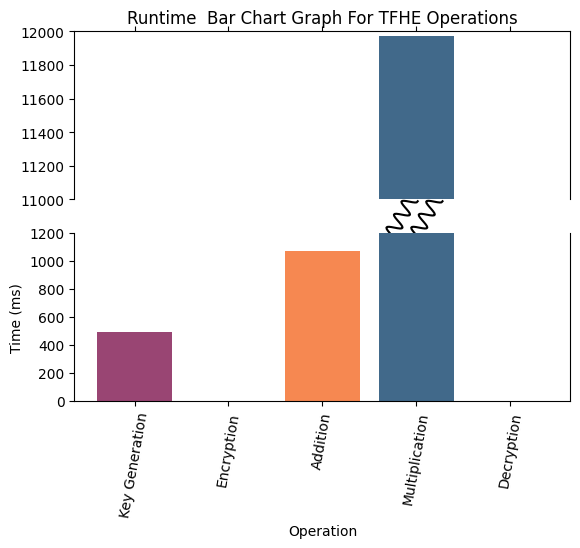

In [22]:
#Ploting All Graphs seperately
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

data = pd.read_csv("tfhe_averages.csv")
filtered_data = data[headers_to_filter]
filtered_array = filtered_data.values[0].flatten()

headers_to_filter = ['tfhekeygenRtime', 'tfheencryptTime', 'tfheAddTime', 'tfheMultTime', 'tfheDecryptTime']
bar_labels = ['red', 'blue', 'orange',  'blue', 'orange']
colors = ['#12436D', '#28A197', '#801650', '#F46A25']
bar_colors = ['#801650', '#801650', '#F46A25', '#12436D','#801650']
labels = ['Key Generation', 'Encryption', 'Addition', 'Multiplication', 'Decryption']

# Filter out the columns to be excluded
filtered_data = data[headers_to_filter]
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# # plot the same data on both axes
ax.bar(labels, filtered_array, label=bar_labels, color=bar_colors, alpha=0.8)
ax2.bar(labels, filtered_array, color=bar_colors, alpha=0.8)

ax.set_ylim(11000, 12000)  # outliers only
ax2.set_ylim(0, 1200)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .045  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

with mpl.rc_context({'path.sketch': (7, 15, 1)}):
    ax.plot((0.65 , 0.73 ), (-0.4, 0.01), **kwargs)  # top-right diagonal
    ax.plot((0.6, 0.68 ), (-0.4, 0.01), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
ax.set_title(f'Runtime  Bar Chart Graph For TFHE Operations')
plt.xticks(rotation=80)
plt.xlabel('Operation')
plt.ylabel('Time (ms)')
plt.show()

[4.928050e+02 5.800000e-01 1.070560e+03 1.197288e+04 3.000000e-02]


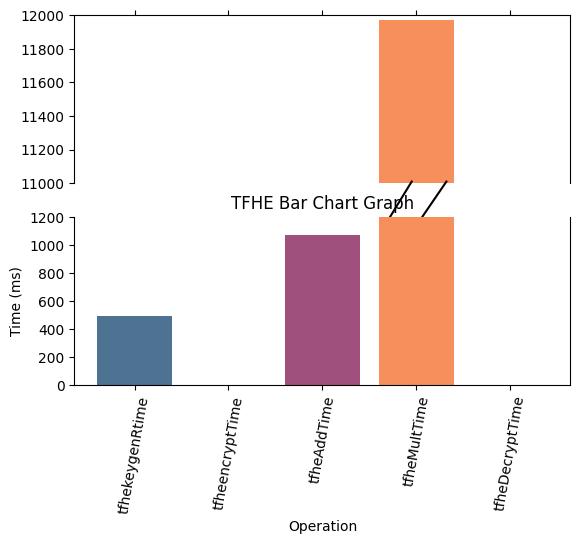

In [3]:
#Ploting All Graphs seperately
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("tfhe_averages.csv")
filtered_data = data[headers_to_filter]

filtered_array = filtered_data.values[0].flatten()
print(filtered_array)


# List of columns you want to exclude
headers_to_filter = ['tfhekeygenRtime', 'tfheencryptTime', 'tfheAddTime', 'tfheMultTime', 'tfheDecryptTime']
# colors = ['blue', 'green', 'red', 'black', 'magenta', 'yellow', 'black']
bar_labels = ['red', 'blue', 'orange',  'blue', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']
colors = ['#12436D', '#28A197', '#801650', '#F46A25']
bar_colors = ['#12436D', '#28A197', '#801650', '#F46A25','#A285D1']
y = [10, 500, 2000, 12000, 6]

# Filter out the columns to be excluded
filtered_data = data[headers_to_filter]
# print(filtered_data)


f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# # plot the same data on both axes
ax.bar(headers_to_filter, filtered_array, label=bar_labels, color=bar_colors, alpha=0.75)
ax2.bar(headers_to_filter, filtered_array, color=bar_colors, alpha=0.75)

ax.set_ylim(11000, 12000)  # outliers only
ax2.set_ylim(0, 1200)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .045  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((0.7 - d, 0.75 ), (-0.4, 0.01), **kwargs)  # top-right diagonal
ax.plot((0.64 - d, 0.68 ), (-0.4, 0.01), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
plt.xlabel('Operation')
plt.ylabel('Time (ms)')
plt.title(f'TFHE Bar Chart Graph')
plt.xticks(rotation=80)
plt.show()